<a href="https://colab.research.google.com/github/mohani98/scraping/blob/main/linkedin_scraping_Numerical_Programming_in_Python_Analyze_it_Yourself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
#importing libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
#defining url and getting response
url="https://in.linkedin.com/jobs/data-science-jobs"
try:
  response=requests.get(url)
  response.raise_for_status()
except requests.exceptions.HTTPError as err:
  print(f"http error occured :{err}")
except Exception as err:
  print(f'Other error occurred: {err}')
soup=BeautifulSoup(response.text,"html.parser")
# printing the response
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="d_jobs_guest_search" name="pageKey"/>
  <!-- -->
  <meta content="urlType=jserp_canonical_keyword;emptyResult=false" name="linkedin:pageTag"/>
  <meta content="en_US" name="locale"/>
  <meta data-app-version="2.0.1596" data-browser-id="ebfb4285-7233-4a9f-8a7c-337522fc328c" data-call-tree-id="AAYSHIgeASipMrBA/JIPAQ==" data-disable-jsbeacon-pagekey-suffix="false" data-enable-page-view-heartbeat-tracking="" data-member-id="0" data-multiproduct-name="jobs-guest-frontend" data-page-instance="urn:li:page:d_jobs_guest_search;pC9d9+zYTsSCKIt5MyilOw==" data-service-name="jobs-guest-frontend" id="config"/>
  <link href="https://in.linkedin.com/jobs/data-science-jobs" rel="canonical"/>
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <!-- -->
  <link href="https://static.licdn.com/aero-v1/sc/h/al2o9zrvru7aqj8e1x2rzsrca" rel="icon"/>
  <script>
   function getDfd() {let yFn,nFn;const p=new Promise(function(y, n){yFn=y;nFn=n;});p.res

In [ ]:
#finding the tags and extracting data then converting into data frame
titlelist=[]
companylist=[]
locationlist=[]
linklist=[]
updatedlist=[]
listclass=soup.find("ul",class_="jobs-search__results-list")
listitems=listclass.find_all('li')
for items in listitems:
  title = items.find('h3',class_="base-search-card__title").text
  company=items.find('h4',class_="base-search-card__subtitle").text
  location=items.find('span',class_="job-search-card__location").text
  atag=items.find('a')
  link=atag['href']
  updated=items.find('time')
  updated=updated['datetime']
  titlelist.append(title.strip())
  companylist.append(company.strip())
  locationlist.append(location.strip())
  linklist.append(link)
  updatedlist.append(updated)
# converting into dataframe
df=pd.DataFrame({'title':titlelist,'company':companylist,'location':locationlist,'link':linklist,'updated':updatedlist})
print(df)

                                      title                  company  \
0                            Data Scientist                   Myntra   
1                            Data Scientist                 Deloitte   
2                            Data Scientist                 Deloitte   
3                              Data Analyst                Microsoft   
4                            DATA SCIENTIST                Microsoft   
5                            Data Scientist                  Infosys   
6                            Data Scientist                    IQVIA   
7                            Data Scientist                   Oracle   
8                              Data Analyst                 JioSaavn   
9          Business Data Scientist, Finance                   Google   
10                             Data Science                  Infosys   
11                           Data Scientist              Volvo Group   
12                           Data Scientist                   ad

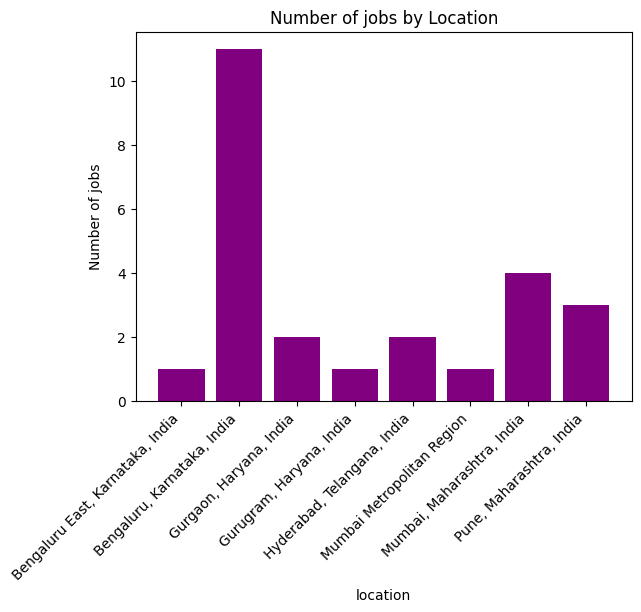

In [ ]:
#data visualization
df=pd.DataFrame({'title':titlelist,'company':companylist,'location':locationlist,'link':linklist,'updated':updatedlist})
loc=df.groupby(['location']).agg({'title':'count'}).reset_index()
x=loc['location']
y=loc['title']
plt.bar(x,y, color='purple')
plt.title('Number of jobs by Location')
plt.xticks(rotation=45, ha='right')
plt.xlabel('location')
plt.ylabel('Number of jobs')
plt.show()
df.to_csv('file2.csv')
